## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)


import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.model_selection import RandomizedSearchCV


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Functions

In [2]:
def plotFor(test,forecasts):
    # Plotting the true values and the predicted values
    plt.figure(figsize=(12, 4))
    plt.plot(test, label='True Values', marker='o')
    plt.plot(forecasts, label='Predicted Values', marker='x')
    plt.title('Random Forest Model Forecast for the Last 8 Observations')
    plt.xlabel('Time')
    plt.ylabel('EUNG Price')
    plt.legend()
    plt.show()

def calculateMAE(test, forecasts):
    mae = mean_absolute_error(test, forecasts)
    return mae

def calculateMAPE(test, forecasts):
    percentage_errors = [abs((actual - predicted) / actual) * 100 for actual, predicted in zip(test, forecasts) if actual != 0]
    mape = sum(percentage_errors) / len(percentage_errors)
    return mape

def calculateMSE(test, forecasts):
    mse = mean_squared_error(test, forecasts)
    return mse

def calculateRMSE(test, forecasts):
    mse = mean_squared_error(test, forecasts)
    rmse = sqrt(mse)
    return rmse

## Main

In [3]:
df = pd.read_excel("Renamed Columns Stationary Data/EUNG.xlsx") 
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df

,EUNG,EUNG_LAG1,EUNG_LAG2,EUNG_LAG3,EUNG_LAG4,USAGDP,Equity Market Volatility,3 Month Treasury Bill,Infectious Disease Tracker,COV19,RUWAR
DATE,,,,,,,,,,,
1996-07-01,0.000000,0.003724,-0.018485,-0.014546,0.029306,0.020675,-4.19,0.09,-0.196710,0,0
1996-10-01,0.088868,0.000000,0.003724,-0.018485,-0.014546,0.012196,1.94,0.08,0.083382,0,0
1997-01-01,-0.013699,0.088868,0.000000,0.003724,-0.018485,0.015662,-0.40,-0.12,-0.446287,0,0
1997-04-01,-0.060409,-0.013699,0.088868,0.000000,0.003724,0.012380,2.70,0.08,0.782759,0,0
1997-07-01,-0.048790,-0.060409,-0.013699,0.088868,0.000000,0.018502,-0.41,-0.01,0.041964,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,0.646442,-0.044776,0.021344,0.636412,0.631536,0.020373,-0.43,0.77,-0.083527,1,1
2022-10-01,-0.730063,0.646442,-0.044776,0.021344,0.636412,0.017477,-3.25,1.58,-0.269102,1,1
2023-01-01,-0.520405,-0.730063,0.646442,-0.044776,0.021344,0.015792,1.58,1.38,0.005921,1,1


In [4]:
import statsmodels.api as sm


y = df['EUNG']
X = df[["EUNG_LAG1","EUNG_LAG2","EUNG_LAG3","EUNG_LAG4","USAGDP","Equity Market Volatility","3 Month Treasury Bill","Infectious Disease Tracker","COV19","RUWAR"]]

# Add a constant term to the feature matrix (for intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   EUNG   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     4.650
Date:                Sat, 20 Jan 2024   Prob (F-statistic):           2.04e-05
Time:                        14:07:50   Log-Likelihood:                 33.842
No. Observations:                 109   AIC:                            -45.68
Df Residuals:                      98   BIC:                            -16.08
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0206      0.026     -0.790      0.432      -0.072       0.031
EUNG_LAG1                      0.2291      0.114      2.018      0.046       0.004       0.454
EUNG_LAG2                     -0.1750      0.105     -1.669      0.098      -0.383       0.033
EUNG_LAG3                      0.1810      0.102      1.773      0.079      -0.022       0.384
EUNG_LAG4                      0.0982      0.114      0.863      0.390      -0.128       0.324
USAGDP                         1.7833      1.601      1.114      0.268      -1.393       4.960
Equity Market Volatility       0.0023      0.003      0.698      0.487      -0.004       0.009
3 Month Treasury Bill         -0.0298      0.053     -0.568      0.572      -0.134       0.075
Infectious Disease Tracker    -0.0641      0.041     -1.554      0.123      -0.146       0.018
COV19                          0.2595      0.077      3.379      0.001       0.107       0.412
RUWAR                         -0.4635      0.135     -3.424      0.001      -0.732      -0.195
==============================================================================
Omnibus:                       18.637   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.032
Skew:                          -0.379   Prob(JB):                     1.02e-15
Kurtosis:                       6.824   Cond. No.                         586.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Droping columns with P > 0.1

In [5]:
selected_columns = ["EUNG","EUNG_LAG1","EUNG_LAG2","EUNG_LAG3","COV19","RUWAR"]
pruned_df = df[selected_columns]

pruned_df = pruned_df.set_index(df.index)
pruned_df

,EUNG,EUNG_LAG1,EUNG_LAG2,EUNG_LAG3,COV19,RUWAR
DATE,,,,,,
1996-07-01,0.000000,0.003724,-0.018485,-0.014546,0,0
1996-10-01,0.088868,0.000000,0.003724,-0.018485,0,0
1997-01-01,-0.013699,0.088868,0.000000,0.003724,0,0
1997-04-01,-0.060409,-0.013699,0.088868,0.000000,0,0
1997-07-01,-0.048790,-0.060409,-0.013699,0.088868,0,0
...,...,...,...,...,...,...
2022-07-01,0.646442,-0.044776,0.021344,0.636412,1,1
2022-10-01,-0.730063,0.646442,-0.044776,0.021344,1,1
2023-01-01,-0.520405,-0.730063,0.646442,-0.044776,1,1


## Tree

In [6]:
# Splitting the data into train and test sets
train, test = train_test_split(pruned_df, test_size=0.09, shuffle=False)

# Defining features and target
features = ["EUNG_LAG1","EUNG_LAG2","EUNG_LAG3","COV19","RUWAR"]
target = "EUNG"

In [7]:
# RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# Hyperparameters range for Randomized Search
param_distributions = {
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 50],
    'min_samples_split': [5, 12],
    'min_samples_leaf': [2, 6],
    'bootstrap': [True, False]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions, n_iter=200, cv=5, random_state=42, n_jobs=-1)

random_search.fit(train[features], train[target])

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 6],
                                        'min_samples_split': [5, 12],
                                        'n_estimators': [100, 200, 500]},
                   random_state=42)

In [8]:
# Best model from random search
best_model = random_search.best_estimator_

test['PREDICTED_EUNG'] = best_model.predict(test[features])

# Outputting the best parameters
best_params = random_search.best_params_
best_params

{'n_estimators': 500,
 'min_samples_split': 12,
 'min_samples_leaf': 6,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

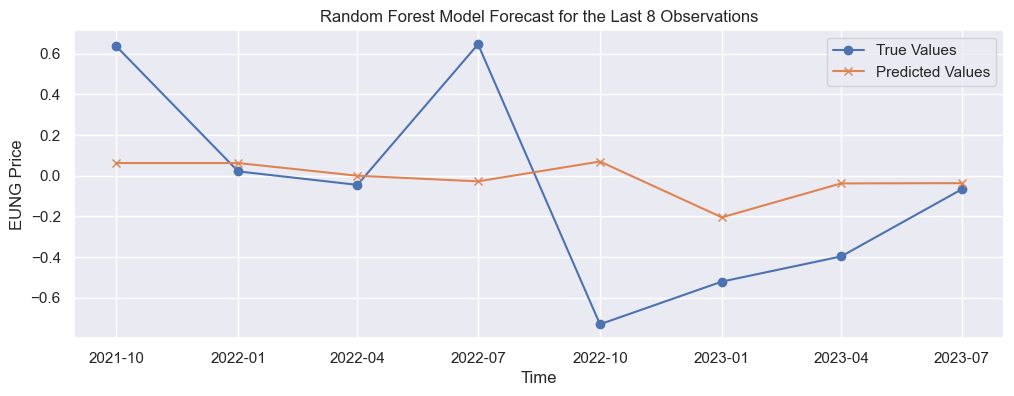

In [15]:
plotFor(test['EUNG'][-8:],test['PREDICTED_EUNG'][-8:])

In [10]:
y_test = test['EUNG']
predictions = test['PREDICTED_EUNG']

In [11]:
print(f"MAE: {calculateMAE(y_test, predictions):.4f}")
print(f"MAPE: {calculateMAPE(y_test, predictions):.4f} %")
print(f"MSE: {calculateMSE(y_test, predictions):.4f}")
print(f"RMSE: {calculateRMSE(y_test, predictions):.4f}")

MAE: 0.3647
MAPE: 96.2809 %
MSE: 0.2038
RMSE: 0.4514


## Saving Prediction

In [12]:
df = pd.DataFrame({'EUNG Q RF': predictions, 'Actual': y_test})
df.to_excel("EUNG_Q_RF_forecast.xlsx", index=True)
df

,EUNG Q RF,Actual
DATE,,
2021-04-01,0.062469,0.301684
2021-07-01,0.062469,0.631536
2021-10-01,0.062469,0.636412
2022-01-01,0.062469,0.021344
2022-04-01,-0.000036,-0.044776
2022-07-01,-0.027526,0.646442
2022-10-01,0.069981,-0.730063
2023-01-01,-0.204484,-0.520405
2023-04-01,-0.037677,-0.396592


In [13]:
# Open a file in write mode
with open('EUNG Q RF Results.txt', 'w') as file:
    # Write the variables to the file
    file.write(f'{calculateMAE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMAPE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMSE(y_test, predictions):.4f}\n')
    file.write(f'{calculateRMSE(y_test, predictions):.4f}\n')